In [1]:
'''This Python module will conduct stage 6 of the Henderson Sports' analytical model, Machine learning application,
with the use of the random forest algorithm to predict the players' values (Adapted from: Holland and Shaw (2019).'''

"This Python module will conduct stage 6 of the Henderson Sports' analytical model, Machine learning application,\nwith the use of the random forest algorithm to predict the players' values (Adapted from: Holland and Shaw (2019)."

In [2]:
# Using regression to predict a player's value

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from sklearn import metrics

value_mid_data = pd.read_csv('file_mid_reg.csv', low_memory=False)
value_att_data = pd.read_csv('file_att_reg.csv', low_memory=False)
value_def_data = pd.read_csv('file_def_reg.csv', low_memory=False)
value_GK_data = pd.read_csv('file_GK_reg.csv', low_memory=False)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Title: User Guide - Pandas
# Author: N/A
# Date: No date
# Code Version: 2.2
# Source: "https://pandas.pydata.org/docs/user_guide/index.html"

# Title: NumPy user guide
# Author: N/A
# Date: No date
# Code Version: 2.0
# Source: "https://numpy.org/doc/stable/user/index.html#user"

# Title: Matplotlib 3.9.2 documentation
# Author: N/A
# Date: No date
# Code Version: 3.9.2
# Source: "https://matplotlib.org/stable/index.html"

# Title: sklearn.model_selection
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.model_selection.html"

# Title: sklearn.ensemble
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable//api/sklearn.ensemble.html"

# Title: sklearn.linear_model
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.linear_model.html"

# Title: sklearn.metrics
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.metrics.html"

In [3]:
# Identify categorical and numerical columns
cat_col_mid_pred = value_mid_data.select_dtypes(include=['object']).columns

num_col_mid_pred = value_mid_data.select_dtypes(include=['float', 'int']).columns

# Define the features and target variable 
feature_val = value_mid_data[num_col_mid_pred].drop(['Market_Value_in_Eur', 'Highest_Market_Value_in_Eur'], axis=1)
target_value = value_mid_data['Market_Value_in_Eur']

# Split the data into training and test sets (Midfielders)
feat_train, feat_test, val_train, val_test = train_test_split(feature_val, target_value, test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

In [4]:
# Create a Random Forest Regressor model
val_ran_for = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model (midfielders)
val_ran_for.fit(feat_train, val_train)

# Get the feature importances (midfielders)
import_val_mid = val_ran_for.feature_importances_

# Sort the features by their importance (midfielders)
feat_import_mid = sorted(zip(import_val_mid, feat_train.columns), reverse=True)

# Print the feature importance (midfielders)
for rank, (feat_import_mid, feature_mid) in enumerate(feat_import_mid, start=1):
    print(f"{rank}. {feature_mid}: {feat_import_mid}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Touches_Att_3rd: 0.10859421554679842
2. Passes_Recieved: 0.05645246436718584
3. Expected_xAG: 0.05226326247194327
4. Carries_Into_Final_1/3: 0.05159145405551171
5. Goals_and_Assists: 0.044022324179714176
6. Carries_Into_Penalty_Box: 0.04375976045716883
7. Touches_Att_Pen: 0.04285041234708403
8. Carries_PrgDist: 0.042750779379616896
9. Tackles_Att_3rd: 0.03830393050639875
10. Crosses: 0.030982341082460233
11. Age: 0.022546006783474553
12. Aerial_Duels_Won_Per: 0.02204882818690963
13. Aerial_Duels_Lost: 0.01879106212798453
14. Score: 0.015569756822940874
15. Touches_Def_Pen: 0.015286883565809576
16. Usage_Rate_Per: 0.014118157402767624
17. Per_90_Min_Non_Pen_Goals: 0.013912763209195366
18. Fouls_Won: 0.013099256179388773
19. Predicted_Performance: 0.011969666218558103
20. Dribblers_Tkl: 0.011596806631146638
21. Playing_Time_MP: 0.011529973282731589
22. Height_in_CM: 0.011485556917931064
23. Dispossessed: 0.010385819510832176
24. Goals: 0.010101730011258251
25. Progressive_Passes_Recie

In [5]:
# Predict value for each player in the midfielder dataset
value_mid_data['Predicted_Value'] = val_ran_for.predict(feature_val)

# Display the midfielder dataset
pred_val_mid = value_mid_data[['Player', 'Predicted_Value']]
print(pred_val_mid)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

               Player  Predicted_Value
0               Rodri       51440000.0
1     Bruno Fernandes       64680000.0
2     Bruno Guimarães       73170000.0
3     Martin Ødegaard       80500000.0
4        Granit Xhaka       22835000.0
..                ...              ...
440     Lilian Egloff        5225000.0
441  Arthur Vermeeren       19568000.0
442         Jack Cork        3563000.0
443         José Mari        4599000.0
444       Luke Harris        5430000.0

[445 rows x 2 columns]


In [6]:
# Sort the DataFrame by the 'Predicted_Value' column
pred_val_mid_1 = value_mid_data.sort_values(by='Predicted_Value', ascending=False)
pred_val_mid_1.head(10)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Contract_Expiration_Date,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value
52,Bayern Munich,Jamal Musiala,26.0,39.0,2.0,11.0,0.0,0.0,0.0,91.0,...,2026-06-30 00:00:00,11WINS,FC Bayern München,110000000.0,110000000.0,1090.0,4.090977,4778.5,4464.590,90520000.0
3,Arsenal,Martin Ødegaard,30.0,36.0,3.0,77.0,1.0,0.0,0.0,158.0,...,2028-06-30 00:00:00,Nordic Sky,Arsenal Football Club,95000000.0,95000000.0,2326.0,8.779678,7088.5,6847.080,80500000.0
8,Real Madrid,Federico Valverde,19.0,15.0,0.0,30.0,0.0,0.0,0.0,160.0,...,2029-06-30 00:00:00,Wasserman,Real Madrid Club de Fútbol,100000000.0,100000000.0,2448.0,8.538542,6388.5,6216.450,74930000.0
2,Newcastle Utd,Bruno Guimarães,50.0,108.0,0.0,32.0,0.0,0.0,0.0,237.0,...,2028-06-30 00:00:00,Bertolucci Sports,Newcastle United Football Club,85000000.0,85000000.0,2734.0,11.389768,7184.5,6938.210,73170000.0
7,RB Leipzig,Xavi Simons,32.0,70.0,1.0,76.0,2.0,0.0,0.0,167.0,...,2024-06-30 00:00:00,Darren Dein,RasenBallsport Leipzig,80000000.0,80000000.0,1817.0,7.791595,6519.0,5962.395,71590000.0
15,Manchester City,Bernardo Silva,22.0,26.0,3.0,83.0,0.0,0.0,0.0,102.0,...,2026-06-30 00:00:00,Gestifute,Manchester City Football Club,80000000.0,100000000.0,2194.0,6.984147,5976.5,5580.905,69565000.0
1,Manchester Utd,Bruno Fernandes,41.0,28.0,13.0,223.0,0.0,0.0,0.0,200.0,...,2026-06-30 00:00:00,MRP.POSITIONUMBER,Manchester United Football Club,70000000.0,90000000.0,2585.0,10.772180,7404.5,6974.685,64680000.0
141,Real Madrid,Aurélien Tchouaméni,20.0,22.0,0.0,22.0,0.0,0.0,0.0,99.0,...,2028-06-30 00:00:00,ESN,Real Madrid Club de Fútbol,90000000.0,90000000.0,1722.0,6.006278,3725.0,4080.370,64225000.0
63,Liverpool,Dominik Szoboszlai,29.0,29.0,3.0,113.0,2.0,0.0,0.0,171.0,...,2028-06-30 00:00:00,EM Sports Consulting,Liverpool Football Club,75000000.0,75000000.0,1802.0,6.264775,4568.0,4668.540,62380000.0
32,Tottenham,James Maddison,21.0,74.0,2.0,133.0,0.0,0.0,0.0,60.0,...,2028-06-30 00:00:00,CAA Base Ltd,Tottenham Hotspur Football Club,70000000.0,70000000.0,1748.0,6.127099,5208.5,5389.475,61646000.0


In [7]:
# This could potentially display whether a playter is "undervalued" or "overvalued"
pred_val_mid_1['Change_in_Value'] = (pred_val_mid_1['Predicted_Value']-pred_val_mid_1['Market_Value_in_Eur'])
pred_val_mid_1.head(10)

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value,Change_in_Value
52,Bayern Munich,Jamal Musiala,26.0,39.0,2.0,11.0,0.0,0.0,0.0,91.0,...,11WINS,FC Bayern München,110000000.0,110000000.0,1090.0,4.090977,4778.5,4464.590,90520000.0,-19480000.0
3,Arsenal,Martin Ødegaard,30.0,36.0,3.0,77.0,1.0,0.0,0.0,158.0,...,Nordic Sky,Arsenal Football Club,95000000.0,95000000.0,2326.0,8.779678,7088.5,6847.080,80500000.0,-14500000.0
8,Real Madrid,Federico Valverde,19.0,15.0,0.0,30.0,0.0,0.0,0.0,160.0,...,Wasserman,Real Madrid Club de Fútbol,100000000.0,100000000.0,2448.0,8.538542,6388.5,6216.450,74930000.0,-25070000.0
2,Newcastle Utd,Bruno Guimarães,50.0,108.0,0.0,32.0,0.0,0.0,0.0,237.0,...,Bertolucci Sports,Newcastle United Football Club,85000000.0,85000000.0,2734.0,11.389768,7184.5,6938.210,73170000.0,-11830000.0
7,RB Leipzig,Xavi Simons,32.0,70.0,1.0,76.0,2.0,0.0,0.0,167.0,...,Darren Dein,RasenBallsport Leipzig,80000000.0,80000000.0,1817.0,7.791595,6519.0,5962.395,71590000.0,-8410000.0
15,Manchester City,Bernardo Silva,22.0,26.0,3.0,83.0,0.0,0.0,0.0,102.0,...,Gestifute,Manchester City Football Club,80000000.0,100000000.0,2194.0,6.984147,5976.5,5580.905,69565000.0,-10435000.0
1,Manchester Utd,Bruno Fernandes,41.0,28.0,13.0,223.0,0.0,0.0,0.0,200.0,...,MRP.POSITIONUMBER,Manchester United Football Club,70000000.0,90000000.0,2585.0,10.772180,7404.5,6974.685,64680000.0,-5320000.0
141,Real Madrid,Aurélien Tchouaméni,20.0,22.0,0.0,22.0,0.0,0.0,0.0,99.0,...,ESN,Real Madrid Club de Fútbol,90000000.0,90000000.0,1722.0,6.006278,3725.0,4080.370,64225000.0,-25775000.0
63,Liverpool,Dominik Szoboszlai,29.0,29.0,3.0,113.0,2.0,0.0,0.0,171.0,...,EM Sports Consulting,Liverpool Football Club,75000000.0,75000000.0,1802.0,6.264775,4568.0,4668.540,62380000.0,-12620000.0
32,Tottenham,James Maddison,21.0,74.0,2.0,133.0,0.0,0.0,0.0,60.0,...,CAA Base Ltd,Tottenham Hotspur Football Club,70000000.0,70000000.0,1748.0,6.127099,5208.5,5389.475,61646000.0,-8354000.0


In [8]:
# Evaluating the Algorithm

# Predicting the midfielders' test set results
val_test_pred = val_ran_for.predict(feat_test)

# Calculate evaluation metrics for midfielders
print('Evaluation Metrics (Midfielders):')
print('Mean Absolute Error:', metrics.mean_absolute_error(val_test, val_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(val_test, val_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_test, val_test_pred)))

# Define the values for the normalised RSME 
rmse = np.sqrt(metrics.mean_squared_error(val_test, val_test_pred))
max_val_mid = value_mid_data['Market_Value_in_Eur'].max()
min_val_mid =  value_mid_data['Market_Value_in_Eur'].min()

# Calculation for the normalised RMSE
normalised_rmse_value = rmse / (max_val_mid - min_val_mid)

print("Normalised RMSE:", normalised_rmse_value)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Midfielders):
Mean Absolute Error: 10437629.213483145
Mean Squared Error: 224150204483146.06
Root Mean Squared Error: 14971646.68575725
Normalised RMSE: 0.1363537949522518


In [9]:
# Attacking Players

In [10]:
# Identify the categorical and numerical columns
cat_col_att_pred = value_att_data.select_dtypes(include=['object']).columns

num_col_att_pred = value_att_data.select_dtypes(include=['float', 'int']).columns

# Define the features and the target variable
feature_val_att = value_att_data[num_col_att_pred].drop(['Market_Value_in_Eur', 'Highest_Market_Value_in_Eur'], axis=1)
target_value_att = value_att_data['Market_Value_in_Eur']

# Split the data into training and test sets (Attacking Players)
feat_train_att, feat_test_att, val_train_att, val_test_att = train_test_split(feature_val_att, target_value_att, 
                                                                              test_size=0.2, random_state=42)


# Create a Random Forest Regressor model (Attacking Players)
val_ran_for_att = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model (Attacking Players)
val_ran_for_att.fit(feat_train_att, val_train_att)

# Get the feature importances (Attacking Players)
import_val_att = val_ran_for_att.feature_importances_

# Sort the features by their importance (Attacking Players)
feat_import_att = sorted(zip(import_val_att, feat_train_att.columns), reverse=True)

# Print the feature importance
for rank, (feat_import_att, feature_att) in enumerate(feat_import_att, start=1):
    print(f"{rank}. {feature_att}: {feat_import_att}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Predicted_Performance: 0.30014460689920214
2. Score: 0.1518636378245786
3. Touches_Att_Pen: 0.08793544227905485
4. Touches_Att_3rd: 0.046046372555225645
5. Goals_and_Assists: 0.04204647250714846
6. Carries_Into_Penalty_Box: 0.02805368086591133
7. Age: 0.02641206780657155
8. Expected_xAG: 0.014130183879696256
9. Aerial_Duels_Won_Per: 0.012876933953214188
10. Take_Ons_Att: 0.012005289616273682
11. Per_90_Min_xAG: 0.011065837185523675
12. Progression_PrgR: 0.009921722399504082
13. Aerial_Duels_Lost: 0.008882822281399685
14. Per_90_Min_npxG+xAG: 0.008415326914457648
15. Carries: 0.00783199701069575
16. Fouls_Commited: 0.006807809468800338
17. Usage_Rate_Per: 0.006752361718455066
18. Per_90_Min_Non_Penalty_Goal_Contributions: 0.0065405846755104136
19. Performance_CrdY: 0.0064792950472235735
20. Progression_PrgP: 0.006299970299426349
21. Crosses: 0.006284093677003717
22. Playing_Time_MP: 0.005880448267018168
23. Per_90_Min_npxG: 0.005856109746692742
24. Dispossessed: 0.005643948217023638


In [11]:
# Predict value for each player in the attacking player dataset
value_att_data['Predicted_Value'] = val_ran_for_att.predict(feature_val_att)

# Display the dataset with non-numerical columns and predictions
pred_val_att = value_att_data[['Player', 'Predicted_Value']]
print(pred_val_att)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

                Player  Predicted_Value
0           Harry Kane      119570000.0
1      Jude Bellingham      155500000.0
2          Cole Palmer      105110000.0
3           Phil Foden      130850000.0
4          Bukayo Saka      128150000.0
..                 ...              ...
685      Dane Scarlett        2256000.0
686          José Pozo        1775500.0
687    David Mamutovic         657000.0
688    Jeppe Corfitzen         729000.0
689  Deivid Washington        9065000.0

[690 rows x 2 columns]


In [12]:
# Sort the DataFrame by the 'Predicted_Value' column
pred_val_att_1 = value_att_data.sort_values(by='Predicted_Value', ascending=False)
pred_val_att_1.head(20)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Contract_Expiration_Date,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value
7,Paris S-G,Kylian Mbappé,19.0,38.0,20.0,23.0,2.0,0.0,0.0,47.0,...,2024-06-30 00:00:00,NaN,Paris Saint-Germain Football Club,180000000.0,200000000.0,1264.0,4.515415,4231.0,4185.511,162350000.0
1,Real Madrid,Jude Bellingham,32.0,72.0,4.0,21.0,0.0,0.0,0.0,118.0,...,2029-06-30 00:00:00,NaN,Real Madrid Club de Fútbol,180000000.0,180000000.0,1897.0,6.616672,4581.7,4391.952,155500000.0
15,Manchester City,Erling Haaland,18.0,31.0,6.0,5.0,2.0,0.0,0.0,47.0,...,2027-06-30 00:00:00,Rafaela Pimenta,Manchester City Football Club,180000000.0,180000000.0,636.0,2.024575,3961.4,4071.335,131440000.0
3,Manchester City,Phil Foden,14.0,60.0,5.0,89.0,0.0,1.0,0.0,127.0,...,2027-06-30 00:00:00,NaN,Manchester City Football Club,130000000.0,130000000.0,2146.0,6.831349,4398.1,4297.740,130850000.0
4,Arsenal,Bukayo Saka,41.0,69.0,8.0,181.0,1.0,0.0,0.0,155.0,...,2027-06-30 00:00:00,NaN,Arsenal Football Club,130000000.0,130000000.0,1952.0,7.367984,4338.5,4225.461,128150000.0
0,Bayern Munich,Harry Kane,10.0,39.0,13.0,31.0,0.0,0.0,0.0,55.0,...,2027-06-30 00:00:00,CK66,FC Bayern München,110000000.0,150000000.0,995.0,3.734424,5367.2,4796.617,119570000.0
11,Inter,Lautaro Martínez,46.0,59.0,12.0,15.0,2.0,1.0,0.0,90.0,...,2026-06-30 00:00:00,Footfeel ISM,Football Club Internazionale Milano S.p.A.,110000000.0,110000000.0,1176.0,4.511105,4059.2,4085.809,106340000.0
2,Chelsea,Cole Palmer,23.0,26.0,6.0,81.0,1.0,0.0,0.0,105.0,...,2030-06-30 00:00:00,CAA Base Ltd,Chelsea Football Club,55000000.0,55000000.0,1754.0,6.326420,4534.4,4075.077,105110000.0
5,Stuttgart,Serhou Guirassy,18.0,55.0,18.0,1.0,2.0,0.0,0.0,39.0,...,2026-06-30 00:00:00,KGSMI,Verein für Bewegungsspiele Stuttgart 1893,40000000.0,40000000.0,1064.0,4.060449,4261.6,4160.658,91200000.0
45,Bayern Munich,Jamal Musiala,26.0,39.0,2.0,11.0,0.0,0.0,0.0,91.0,...,2026-06-30 00:00:00,11WINS,FC Bayern München,110000000.0,110000000.0,1090.0,4.090977,3394.3,3376.282,87680000.0


In [13]:
pred_val_att_1['Change_in_Value'] = (pred_val_att_1['Predicted_Value']-pred_val_att_1['Market_Value_in_Eur'])
pred_val_att_1.head(20)

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value,Change_in_Value
7,Paris S-G,Kylian Mbappé,19.0,38.0,20.0,23.0,2.0,0.0,0.0,47.0,...,NaN,Paris Saint-Germain Football Club,180000000.0,200000000.0,1264.0,4.515415,4231.0,4185.511,162350000.0,-17650000.0
1,Real Madrid,Jude Bellingham,32.0,72.0,4.0,21.0,0.0,0.0,0.0,118.0,...,NaN,Real Madrid Club de Fútbol,180000000.0,180000000.0,1897.0,6.616672,4581.7,4391.952,155500000.0,-24500000.0
15,Manchester City,Erling Haaland,18.0,31.0,6.0,5.0,2.0,0.0,0.0,47.0,...,Rafaela Pimenta,Manchester City Football Club,180000000.0,180000000.0,636.0,2.024575,3961.4,4071.335,131440000.0,-48560000.0
3,Manchester City,Phil Foden,14.0,60.0,5.0,89.0,0.0,1.0,0.0,127.0,...,NaN,Manchester City Football Club,130000000.0,130000000.0,2146.0,6.831349,4398.1,4297.740,130850000.0,850000.0
4,Arsenal,Bukayo Saka,41.0,69.0,8.0,181.0,1.0,0.0,0.0,155.0,...,NaN,Arsenal Football Club,130000000.0,130000000.0,1952.0,7.367984,4338.5,4225.461,128150000.0,-1850000.0
0,Bayern Munich,Harry Kane,10.0,39.0,13.0,31.0,0.0,0.0,0.0,55.0,...,CK66,FC Bayern München,110000000.0,150000000.0,995.0,3.734424,5367.2,4796.617,119570000.0,9570000.0
11,Inter,Lautaro Martínez,46.0,59.0,12.0,15.0,2.0,1.0,0.0,90.0,...,Footfeel ISM,Football Club Internazionale Milano S.p.A.,110000000.0,110000000.0,1176.0,4.511105,4059.2,4085.809,106340000.0,-3660000.0
2,Chelsea,Cole Palmer,23.0,26.0,6.0,81.0,1.0,0.0,0.0,105.0,...,CAA Base Ltd,Chelsea Football Club,55000000.0,55000000.0,1754.0,6.326420,4534.4,4075.077,105110000.0,50110000.0
5,Stuttgart,Serhou Guirassy,18.0,55.0,18.0,1.0,2.0,0.0,0.0,39.0,...,KGSMI,Verein für Bewegungsspiele Stuttgart 1893,40000000.0,40000000.0,1064.0,4.060449,4261.6,4160.658,91200000.0,51200000.0
45,Bayern Munich,Jamal Musiala,26.0,39.0,2.0,11.0,0.0,0.0,0.0,91.0,...,11WINS,FC Bayern München,110000000.0,110000000.0,1090.0,4.090977,3394.3,3376.282,87680000.0,-22320000.0


In [14]:
# Evaluating the Algorithm

# Predicting the attacking players' test set results
val_test_pred_att = val_ran_for_att.predict(feat_test_att)

# Calculate evaluation metrics for attacking players
print('Evaluation Metrics (Attacking Players):')
print('Mean Absolute Error:', metrics.mean_absolute_error(val_test_att, val_test_pred_att))  
print('Mean Squared Error:', metrics.mean_squared_error(val_test_att, val_test_pred_att))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_test_att, val_test_pred_att)))

# Define the values for the normalised RSME
rmse = np.sqrt(metrics.mean_squared_error(val_test_att, val_test_pred_att))
max_val_att = value_att_data['Market_Value_in_Eur'].max()
min_val_att =  value_att_data['Market_Value_in_Eur'].min()

# Calculation for the normalised RMSE
normalised_rmse_value_att = rmse / (max_val_att - min_val_att)

print("Normalised RMSE:", normalised_rmse_value_att)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Attacking Players):
Mean Absolute Error: 10345403.985507246
Mean Squared Error: 238039244663496.38
Root Mean Squared Error: 15428520.494963098
Normalised RMSE: 0.0857259091260625


In [15]:
# Defenders

In [16]:
cat_col_def_pred = value_def_data.select_dtypes(include=['object']).columns

num_col_def_pred = value_def_data.select_dtypes(include=['float', 'int']).columns

# Define the features and target variable
feature_val_def = value_def_data[num_col_def_pred].drop(['Market_Value_in_Eur', 'Highest_Market_Value_in_Eur'], axis=1)
target_value_def = value_def_data['Market_Value_in_Eur']

# Split the data into training and test sets (Defenders)
feat_train_def, feat_test_def, val_train_def, val_test_def = train_test_split(feature_val_def, target_value_def, 
                                                                      test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

In [17]:
# Create a Random Forest Regressor model (Defenders)
val_ran_for_def = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model (Defenders)
val_ran_for_def.fit(feat_train_def, val_train_def)

# Get the feature importances (Defenders)
import_val_def = val_ran_for_def.feature_importances_

# Sort the features by their importance (Defenders)
feat_import_def = sorted(zip(import_val_def, feat_train_def.columns), reverse=True)

# Print the feature importance (Defenders)
for rank, (feat_import_def, feature) in enumerate(feat_import_def, start=1):
    print(f"{rank}. {feature}: {feat_import_def}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Passes_Recieved: 0.28778298764612215
2. Age: 0.06594869256904674
3. Carries: 0.040219133973048056
4. Usage_Rate_Per: 0.021266350975362263
5. Touches_Mid_3rd: 0.020253203987194116
6. Per_90_Min_xAG: 0.01857026656569737
7. Per_Dribblers_Tkl_Succ: 0.01838077751933054
8. Clearances: 0.017051136816297472
9. Fouls_Commited: 0.016784361924856068
10. Per_90_Min_Non_Pen_Goals: 0.01484368947066624
11. Predicted_Performance: 0.014019934453122758
12. Progression_PrgP: 0.012872750287070855
13. Playing_Time_Min: 0.012328365003984399
14. Tkl_Plus_Int: 0.012230586691089737
15. Aerial_Duels_Won_Per: 0.012174621898724236
16. Interceptions: 0.0116462504630257
17. Aerial_Duels_Lost: 0.011617762450456034
18. Per_90_Min_Goal_Contributions: 0.011265316314880355
19. Blocked_Passes: 0.011194056418487114
20. Performance_CrdY: 0.010864108802280408
21. Dribblers_Challenged: 0.01078685054648554
22. Tackles_Def_3rd: 0.010774228352620924
23. Challenges_Lost: 0.010765124089162185
24. Per_90_Min_xG+xAG: 0.010395992

In [18]:
# Predict value for each player in the defender dataset
value_def_data['Predicted_Value'] = val_ran_for_def.predict(feature_val_def)

# Display the dataset with non-numerical columns and predictions
pred_val_def = value_def_data[['Player', 'Predicted_Value']]
print(pred_val_def)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

               Player  Predicted_Value
0         Pedro Porro       41210000.0
1    Antonee Robinson       19332000.0
2         Timo Hübers       13640000.0
3       Sergi Cardona       15750000.0
4            Bernardo        9123500.0
..                ...              ...
718  Mahamadou Nagida        9281300.0
719   Aitor Fernández        3673000.0
720        Borna Sosa       15271500.0
721    Jérémy Jacquet        2499850.0
722       Enzo Ebosse        2721250.0

[723 rows x 2 columns]


In [19]:
# Sort the DataFrame by the 'Predicted_Value' column
pred_val_def_1 = value_def_data.sort_values(by='Predicted_Value', ascending=False)
pred_val_def_1.head(20)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Contract_Expiration_Date,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value
64,Arsenal,William Saliba,22.0,16.0,0.0,3.0,0.0,1.0,0.0,213.0,...,2027-06-30 00:00:00,ND SPORTS MANAGEMENT,Arsenal Football Club,80000000.0,80000000.0,3093.0,11.674782,4678.2,4852.445,65110000.0
119,Manchester City,Rúben Dias,23.0,15.0,0.0,13.0,0.0,1.0,1.0,108.0,...,2027-06-30 00:00:00,Gestifute,Manchester City Football Club,80000000.0,80000000.0,2877.0,9.158337,4355.5,5015.950,63810000.0
94,Liverpool,Trent Alexander-Arnold,9.0,9.0,2.0,168.0,0.0,0.0,0.0,176.0,...,2025-06-30 00:00:00,PLG,Liverpool Football Club,70000000.0,110000000.0,2296.0,7.982200,4461.8,5054.730,62060000.0
95,Bayern Munich,Joshua Kimmich,11.0,24.0,2.0,195.0,0.0,0.0,0.0,140.0,...,2025-06-30 00:00:00,NaN,FC Bayern München,60000000.0,90000000.0,2453.0,9.206576,4461.5,5698.925,54450000.0
198,Paris S-G,Achraf Hakimi,22.0,26.0,3.0,79.0,0.0,1.0,0.0,142.0,...,2026-06-30 00:00:00,Footfeel ISM,Paris Saint-Germain Football Club,65000000.0,70000000.0,2217.0,7.919837,4032.4,5755.290,52280000.0
163,Milan,Theo Hernández,38.0,50.0,2.0,68.0,1.0,1.0,0.0,172.0,...,2026-06-30 00:00:00,NaN,Associazione Calcio Milan,60000000.0,60000000.0,2270.0,9.254352,4163.7,5265.655,50890000.0
431,Bayern Munich,Matthijs de Ligt,12.0,8.0,0.0,2.0,0.0,0.0,0.0,73.0,...,2027-06-30 00:00:00,Rafaela Pimenta,FC Bayern München,65000000.0,75000000.0,1330.0,4.991743,3222.5,3465.235,49390000.0
15,Tottenham,Cristian Romero,31.0,24.0,1.0,3.0,0.0,2.0,1.0,189.0,...,2027-06-30 00:00:00,Ciro Palermo,Tottenham Hotspur Football Club,60000000.0,65000000.0,2923.0,10.245715,5438.0,5308.855,47760000.0
45,Leverkusen,Alejandro Grimaldo,14.0,26.0,3.0,202.0,1.0,0.0,0.0,168.0,...,2027-06-30 00:00:00,Wasserman,Bayer 04 Leverkusen Fußball,45000000.0,45000000.0,2465.0,8.857348,4877.2,5248.805,47260000.0
73,Arsenal,Ben White,19.0,12.0,11.0,57.0,0.0,0.0,0.0,120.0,...,2028-06-30 00:00:00,NaN,Arsenal Football Club,55000000.0,55000000.0,2456.0,9.270373,4620.9,4940.460,46745000.0


In [20]:
pred_val_def_1['Change_in_Value'] = (pred_val_def_1['Predicted_Value']-pred_val_def_1['Market_Value_in_Eur'])
pred_val_def_1.head(20)

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value,Change_in_Value
64,Arsenal,William Saliba,22.0,16.0,0.0,3.0,0.0,1.0,0.0,213.0,...,ND SPORTS MANAGEMENT,Arsenal Football Club,80000000.0,80000000.0,3093.0,11.674782,4678.2,4852.445,65110000.0,-14890000.0
119,Manchester City,Rúben Dias,23.0,15.0,0.0,13.0,0.0,1.0,1.0,108.0,...,Gestifute,Manchester City Football Club,80000000.0,80000000.0,2877.0,9.158337,4355.5,5015.950,63810000.0,-16190000.0
94,Liverpool,Trent Alexander-Arnold,9.0,9.0,2.0,168.0,0.0,0.0,0.0,176.0,...,PLG,Liverpool Football Club,70000000.0,110000000.0,2296.0,7.982200,4461.8,5054.730,62060000.0,-7940000.0
95,Bayern Munich,Joshua Kimmich,11.0,24.0,2.0,195.0,0.0,0.0,0.0,140.0,...,NaN,FC Bayern München,60000000.0,90000000.0,2453.0,9.206576,4461.5,5698.925,54450000.0,-5550000.0
198,Paris S-G,Achraf Hakimi,22.0,26.0,3.0,79.0,0.0,1.0,0.0,142.0,...,Footfeel ISM,Paris Saint-Germain Football Club,65000000.0,70000000.0,2217.0,7.919837,4032.4,5755.290,52280000.0,-12720000.0
163,Milan,Theo Hernández,38.0,50.0,2.0,68.0,1.0,1.0,0.0,172.0,...,NaN,Associazione Calcio Milan,60000000.0,60000000.0,2270.0,9.254352,4163.7,5265.655,50890000.0,-9110000.0
431,Bayern Munich,Matthijs de Ligt,12.0,8.0,0.0,2.0,0.0,0.0,0.0,73.0,...,Rafaela Pimenta,FC Bayern München,65000000.0,75000000.0,1330.0,4.991743,3222.5,3465.235,49390000.0,-15610000.0
15,Tottenham,Cristian Romero,31.0,24.0,1.0,3.0,0.0,2.0,1.0,189.0,...,Ciro Palermo,Tottenham Hotspur Football Club,60000000.0,65000000.0,2923.0,10.245715,5438.0,5308.855,47760000.0,-12240000.0
45,Leverkusen,Alejandro Grimaldo,14.0,26.0,3.0,202.0,1.0,0.0,0.0,168.0,...,Wasserman,Bayer 04 Leverkusen Fußball,45000000.0,45000000.0,2465.0,8.857348,4877.2,5248.805,47260000.0,2260000.0
73,Arsenal,Ben White,19.0,12.0,11.0,57.0,0.0,0.0,0.0,120.0,...,NaN,Arsenal Football Club,55000000.0,55000000.0,2456.0,9.270373,4620.9,4940.460,46745000.0,-8255000.0


In [21]:
# Evaluating the Algorithm

# Predicting the defenders' test set results
val_test_pred_def = val_ran_for_def.predict(feat_test_def)

# Calculate evaluation metrics for defenders
print('Evaluation Metrics (Defenders):')
print('Mean Absolute Error:', metrics.mean_absolute_error(val_test_def, val_test_pred_def))  
print('Mean Squared Error:', metrics.mean_squared_error(val_test_def, val_test_pred_def))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_test_def, val_test_pred_def)))

# Define the values for the normalised RSME
rmse_def = np.sqrt(metrics.mean_squared_error(val_test_def, val_test_pred_def))
max_val_def = value_def_data['Market_Value_in_Eur'].max()
min_val_def =  value_def_data['Market_Value_in_Eur'].min()

# Calculation for the normalised RMSE
normalised_rmse_value_def = rmse_def / (max_val_def - min_val_def)

print("Normalised RMSE:", normalised_rmse_value_def)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Defenders):
Mean Absolute Error: 7158980.0
Mean Squared Error: 109825645152931.03
Root Mean Squared Error: 10479773.144153982
Normalised RMSE: 0.1310135409945491


In [22]:
# Goalkeepers

In [23]:
cat_col_GK_pred = value_GK_data.select_dtypes(include=['object']).columns

num_col_GK_pred = value_GK_data.select_dtypes(include=['float', 'int']).columns

# Define the features and target variable (Goalkeepers)
feature_val_GK = value_GK_data[num_col_GK_pred].drop(['Market_Value_in_Eur', 'Highest_Market_Value_in_Eur'], axis=1)
target_value_GK = value_GK_data['Market_Value_in_Eur']

# Split the data into training and test sets (Goalkeepers)
feat_train_GK, feat_test_GK, val_train_GK, val_test_GK = train_test_split(feature_val_GK, target_value_GK, 
                                                                      test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

In [24]:
# Create a Random Forest Regressor model (Goalkeepers)
val_ran_for_GK = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model (Goalkeepers)
val_ran_for_GK.fit(feat_train_GK, val_train_GK)

# Get the feature importances (Goalkeepers)
import_val_GK = val_ran_for_GK.feature_importances_

# Sort the features by their importance (Goalkeepers)
feat_import_GK = sorted(zip(import_val_GK, feat_train_GK.columns), reverse=True)

# Print the feature importance (Goalkeepers)
for rank_GK, (feat_import_GK, feature_GK) in enumerate(feat_import_GK, start=1):
    print(f"{rank_GK}. {feature_GK}: {feat_import_GK}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. PSxG_minus_GA: 0.14945607016710385
2. Avg_Pass_Length: 0.08332891617006677
3. Throws_Attemp: 0.08086606957933076
4. Crosses_Stp: 0.07712300568660688
5. Per_Passes_Launched: 0.06612566827370162
6. Crosses_Stp_Per: 0.0649613194881085
7. Score: 0.05699796647239749
8. Crosses_Faced: 0.05666166048608115
9. Number_of_Sweep: 0.0449361224704469
10. Long_Pass_Acc_per: 0.03592120300713704
11. Passes_Attempted: 0.02927287991572892
12. Usage_Rate_Per: 0.028567908272399918
13. Rk: 0.025240026559208522
14. Predicted_Performance: 0.025126224263499624
15. Height_in_CM: 0.023743569957061065
16. Age: 0.02172888735149777
17. Touches: 0.02132011344644986
18. Avg_Length_Goal_Kick: 0.0178643476049122
19. PSxG_minus_GA_90: 0.01752881536640791
20. Goal_Kicks_Att: 0.016332313752851813
21. Sweeper_Avg_Dist: 0.014167339212427615
22. Performance_Save_Per: 0.013559479037300277
23. Number_of_Sweep_per_90: 0.01130944225463457
24. Penalty_Kick_Save_Per: 0.008842287362224288
25. Per_Goal_Kicks_Launch: 0.00444621059

In [25]:
# Predict value for each player in the Goalkeeper dataset
value_GK_data['Predicted_Value'] = val_ran_for_GK.predict(feature_val_GK)

# Display the dataset with non-numerical columns and predictions
pred_val_GK = value_GK_data[['Player', 'Predicted_Value']]
print(pred_val_GK)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

                 Player  Predicted_Value
0        Sergio Herrera        5737000.0
1        Oliver Baumann        8363000.0
2            Unai Simón       19818000.0
3        Manuel Riemann        4799000.0
4     Federico Ravaglia        9696000.0
..                  ...              ...
122       Simone Aresti        1011000.0
123       Remi Matthews        2281000.0
124     Jean-Louis Leca         383500.0
125  Tommaso Martinelli        6020500.0
126       Daniel Peretz        2528250.0

[127 rows x 2 columns]


In [26]:
# Sort the DataFrame by the 'Predicted_Value' column
pred_val_GK_1 = value_GK_data.sort_values(by='Predicted_Value', ascending=False)
pred_val_GK_1.head(20)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

,Squad,Player,Country_of_Birth,Country_of_Citizenship,DOB,Position,Foot,Height_in_CM,Contract_Expiration_Date,Agent_Name,...,Performance_Save_Per,Penalties_saved,Penalty Kicks PKm,Penalty_Kick_Save_Per,Rk,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value
43,Milan,Mike Maignan,French Guiana,France,1995-07-03,Goalkeeper,right,191.0,2026-06-30 00:00:00,ESN,...,77.5,0.0,0.0,0.0,1569.0,1285.0,5.238697,435.9,436.651,33252000.0
17,Paris S-G,Gianluigi Donnarumma,Italy,Italy,1999-02-25,Goalkeeper,right,196.0,2026-06-30 00:00:00,Team Raiola,...,84.5,1.0,0.0,25.0,751.0,842.0,3.870019,629.1,590.587,32185000.0
34,Dortmund,Gregor Kobel,Switzerland,Switzerland,1997-12-06,Goalkeeper,right,196.0,2028-06-30 00:00:00,SBE Management AG,...,75.4,1.0,0.0,16.7,1349.0,1239.0,5.443283,486.8,465.320,31158000.0
24,Manchester City,Ederson,Brazil,Brazil,1993-08-17,Goalkeeper,left,188.0,2026-06-30 00:00:00,Gestifute,...,70.7,0.0,0.0,0.0,794.0,1283.0,5.346502,574.3,562.024,30645000.0
14,Arsenal,David Raya,Spain,Spain,1995-09-15,Goalkeeper,right,183.0,2024-06-30 00:00:00,FUTBOL21 AGENCY,...,68.1,1.0,0.0,33.3,2203.0,1099.0,4.148266,661.3,660.764,28340000.0
6,Valencia,Giorgi Mamardashvili,Georgia,Georgia,2000-09-29,Goalkeeper,left,197.0,2027-06-30 00:00:00,Free Football,...,73.8,3.0,0.0,50.0,1589.0,1216.0,5.349993,742.3,726.825,27324000.0
12,Aston Villa,Emiliano Martínez,Argentina,Argentina,1992-09-02,Goalkeeper,right,195.0,2027-06-30 00:00:00,Universal Twenty Two,...,66.2,0.0,0.0,0.0,1641.0,1509.0,6.252072,673.3,630.072,26319000.0
31,Barcelona,Marc-André ter Stegen,Germany,Germany,1992-04-30,Goalkeeper,right,187.0,2028-06-30 00:00:00,ROOF,...,75.5,0.0,0.0,0.0,2570.0,1080.0,3.760839,516.9,499.190,24522000.0
19,Tottenham,Guglielmo Vicario,Italy,Italy,1996-10-07,Goalkeeper,right,194.0,2028-06-30 00:00:00,GG11,...,67.7,0.0,0.0,0.0,2696.0,1680.0,9.421794,617.2,588.643,23545000.0
68,Atlético Madrid,Jan Oblak,Slovenia,Slovenia,1993-01-07,Goalkeeper,right,188.0,2028-06-30 00:00:00,Miha Mlakar,...,70.8,0.0,1.0,0.0,1942.0,1094.0,6.034530,324.5,334.580,22263000.0


In [27]:
pred_val_GK_1['Change_in_Value'] = (pred_val_GK_1['Predicted_Value']-pred_val_GK_1['Market_Value_in_Eur'])
pred_val_GK_1.head(20)

,Squad,Player,Country_of_Birth,Country_of_Citizenship,DOB,Position,Foot,Height_in_CM,Contract_Expiration_Date,Agent_Name,...,Penalties_saved,Penalty Kicks PKm,Penalty_Kick_Save_Per,Rk,Touches,Usage_Rate_Per,Score,Predicted_Performance,Predicted_Value,Change_in_Value
43,Milan,Mike Maignan,French Guiana,France,1995-07-03,Goalkeeper,right,191.0,2026-06-30 00:00:00,ESN,...,0.0,0.0,0.0,1569.0,1285.0,5.238697,435.9,436.651,33252000.0,-6748000.0
17,Paris S-G,Gianluigi Donnarumma,Italy,Italy,1999-02-25,Goalkeeper,right,196.0,2026-06-30 00:00:00,Team Raiola,...,1.0,0.0,25.0,751.0,842.0,3.870019,629.1,590.587,32185000.0,-7815000.0
34,Dortmund,Gregor Kobel,Switzerland,Switzerland,1997-12-06,Goalkeeper,right,196.0,2028-06-30 00:00:00,SBE Management AG,...,1.0,0.0,16.7,1349.0,1239.0,5.443283,486.8,465.320,31158000.0,-8842000.0
24,Manchester City,Ederson,Brazil,Brazil,1993-08-17,Goalkeeper,left,188.0,2026-06-30 00:00:00,Gestifute,...,0.0,0.0,0.0,794.0,1283.0,5.346502,574.3,562.024,30645000.0,-9355000.0
14,Arsenal,David Raya,Spain,Spain,1995-09-15,Goalkeeper,right,183.0,2024-06-30 00:00:00,FUTBOL21 AGENCY,...,1.0,0.0,33.3,2203.0,1099.0,4.148266,661.3,660.764,28340000.0,-6660000.0
6,Valencia,Giorgi Mamardashvili,Georgia,Georgia,2000-09-29,Goalkeeper,left,197.0,2027-06-30 00:00:00,Free Football,...,3.0,0.0,50.0,1589.0,1216.0,5.349993,742.3,726.825,27324000.0,-7676000.0
12,Aston Villa,Emiliano Martínez,Argentina,Argentina,1992-09-02,Goalkeeper,right,195.0,2027-06-30 00:00:00,Universal Twenty Two,...,0.0,0.0,0.0,1641.0,1509.0,6.252072,673.3,630.072,26319000.0,-1681000.0
31,Barcelona,Marc-André ter Stegen,Germany,Germany,1992-04-30,Goalkeeper,right,187.0,2028-06-30 00:00:00,ROOF,...,0.0,0.0,0.0,2570.0,1080.0,3.760839,516.9,499.190,24522000.0,-5478000.0
19,Tottenham,Guglielmo Vicario,Italy,Italy,1996-10-07,Goalkeeper,right,194.0,2028-06-30 00:00:00,GG11,...,0.0,0.0,0.0,2696.0,1680.0,9.421794,617.2,588.643,23545000.0,-11455000.0
68,Atlético Madrid,Jan Oblak,Slovenia,Slovenia,1993-01-07,Goalkeeper,right,188.0,2028-06-30 00:00:00,Miha Mlakar,...,0.0,1.0,0.0,1942.0,1094.0,6.034530,324.5,334.580,22263000.0,-7737000.0


In [28]:
# Evaluating the Algorithm

# Predicting the goalkeepers' test set results
val_test_pred_GK = val_ran_for_GK.predict(feat_test_GK)

# Calculate evaluation metrics for goalkeepers
print('Evaluation Metrics (Goalkeepers):')
print('Mean Absolute Error:', metrics.mean_absolute_error(val_test_GK, val_test_pred_GK))  
print('Mean Squared Error:', metrics.mean_squared_error(val_test_GK, val_test_pred_GK))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_test_GK, val_test_pred_GK)))

# Define the values for the normalised RSME
rmse_GK = np.sqrt(metrics.mean_squared_error(val_test_GK, val_test_pred_GK))
max_val_GK = value_GK_data['Market_Value_in_Eur'].max()
min_val_GK =  value_GK_data['Market_Value_in_Eur'].min()

# Calculation for the normalised RMSE (goalkeepers)
normalised_rmse_value_GK = rmse_GK / (max_val_GK - min_val_GK)

print("Normalised RMSE:", normalised_rmse_value_GK)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Goalkeepers):
Mean Absolute Error: 5470278.846153846
Mean Squared Error: 67576926180288.46
Root Mean Squared Error: 8220518.607745405
Normalised RMSE: 0.20589902586713602


R-squared: 0.8176753128340286


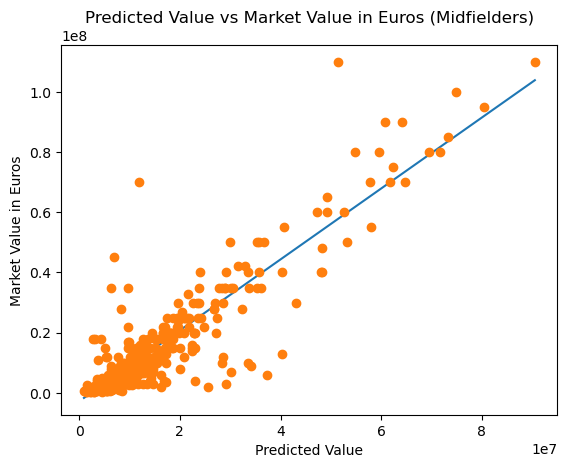

In [29]:
# Creating the linear regression model
model_mid = LinearRegression()

pred_val_mid_2 = pd.DataFrame(pred_val_mid_1)

# Define X and response y variables using the predicted and market value for midfielders
X_mid = pred_val_mid_2[['Predicted_Value']]  
y_mid = pred_val_mid_2['Market_Value_in_Eur']

# Evaluating the model
model_mid.fit(X_mid, y_mid)
rsq_mid = model_mid.score(X_mid, y_mid)
print(f'R-squared: {rsq_mid}')


x_mid = pred_val_mid_1['Predicted_Value']
y_mid = pred_val_mid_1['Market_Value_in_Eur']

# Obtain m (slope) and b(intercept) of linear regression line (midfielders)
m, b = np.polyfit(x_mid, y_mid, 1)

# Add linear regression line to the scatterplot graph (midfielders)
plt.plot(x_mid, m * x_mid + b)

# Create the basic scatterplot graph
plt.plot(x_mid, y_mid, 'o')
plt.title('Predicted Value vs Market Value in Euros (Midfielders)')
plt.xlabel('Predicted Value')
plt.ylabel('Market Value in Euros')
plt.show()

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

R-squared: 0.8680115246771305


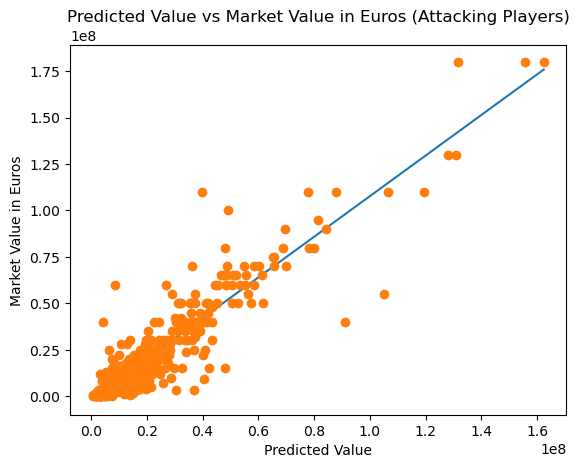

In [30]:
# Creating the linear regression model
model_att = LinearRegression()

pred_val_att_2 = pd.DataFrame(pred_val_att_1)

# Define X and response y variables using the predicted and market value for attacking players
X_att = pred_val_att_2[['Predicted_Value']]  
y_att = pred_val_att_2['Market_Value_in_Eur']

# Evaluating the model
model_att.fit(X_att, y_att)
rsq_mid = model_att.score(X_att, y_att)
print(f'R-squared: {rsq_mid}')

# Create the scatterplot graph
x_att_line = pred_val_att_1['Predicted_Value']
y_att_line = pred_val_att_1['Market_Value_in_Eur']

# Obtain m(slope) and b(intercept) to create the linear regression line (Attacking Players)
m, b = np.polyfit(x_att_line, y_att_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_att_line, m * x_att_line + b)

# 
plt.plot(x_att_line, y_att_line, 'o')
plt.title('Predicted Value vs Market Value in Euros (Attacking Players)')
plt.xlabel('Predicted Value')
plt.ylabel('Market Value in Euros')
plt.show()

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

R-squared: 0.8211902205690389


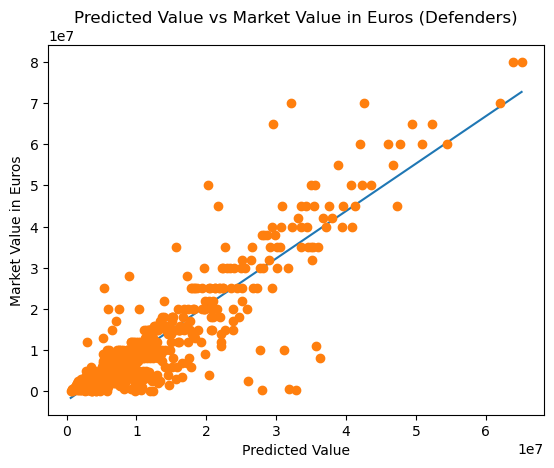

In [31]:
# Creating the linear regression model
model_def = LinearRegression()


pred_val_def_2 = pd.DataFrame(pred_val_def_1)

# Define X and response y variables using the predicted and market value for defenders
X_def = pred_val_def_2[['Predicted_Value']]  
y_def = pred_val_def_2['Market_Value_in_Eur']

# Evaluating the model
model_def.fit(X_def, y_def)
rsq_def = model_def.score(X_def, y_def)
print(f'R-squared: {rsq_def}')

# Create the scatterplot graph
x_def_line = pred_val_def_1['Predicted_Value']
y_def_line = pred_val_def_1['Market_Value_in_Eur']

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_def_line, y_def_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_def_line, m * x_def_line + b)

plt.plot(x_def_line, y_def_line, 'o')
plt.title('Predicted Value vs Market Value in Euros (Defenders)')
plt.xlabel('Predicted Value')
plt.ylabel('Market Value in Euros')
plt.show()

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

R-squared: 0.8340104468707998


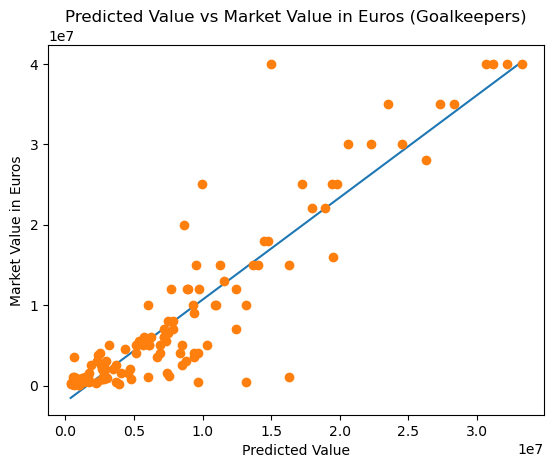

In [32]:
# Creating the linear regression model
model_GK = LinearRegression()


pred_val_GK_2 = pd.DataFrame(pred_val_GK_1)

# Define X and response y variables using the predicted and market value for goalkeepers
X_GK = pred_val_GK_2[['Predicted_Value']]  
y_GK = pred_val_GK_2['Market_Value_in_Eur']

# Evaluating the model
model_GK.fit(X_GK, y_GK)
rsq_GK = model_GK.score(X_GK, y_GK)
print(f'R-squared: {rsq_GK}')

# Create the scatterplot graph
x_GK_line = pred_val_GK_1['Predicted_Value']
y_GK_line = pred_val_GK_1['Market_Value_in_Eur']

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_GK_line, y_GK_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_GK_line, m * x_GK_line + b)

plt.plot(x_GK_line, y_GK_line, 'o')
plt.title('Predicted Value vs Market Value in Euros (Goalkeepers)')
plt.xlabel('Predicted Value')
plt.ylabel('Market Value in Euros')
plt.show()

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

In [33]:
# Save all the new datasets as CSVs 
pred_val_mid_1.to_csv('file_mid_wig.csv', encoding='utf-8-sig', index=False)
pred_val_att_1.to_csv('file_att_wig.csv', encoding='utf-8-sig', index=False)
pred_val_def_1.to_csv('file_def_wig.csv', encoding='utf-8-sig', index=False)
pred_val_GK_1.to_csv('file_GK_wig.csv', encoding='utf-8-sig', index=False)

In [34]:
'''Reference List

Bharathiraja (2018) Random Forest Regression Using Python Sklearn From Scratch. Medium [online]. 
Available at: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb  [Accessed on: 31st July 2024]

Bobbitt, Z. (2021) What is Considered a Good RMSE Value? Statology [online]. 
Available at: https://www.statology.org/what-is-a-good-rmse/ [Accessed on: 30th July 2024]

Bobbitt, Z. (2021) MSE vs. RMSE: Which Metric Should You Use? Statology [online]. 
Available at: https://www.statology.org/mse-vs-rmse/ [Accessed on: 30th July 2024]

MaFisher (2023) Drafting The Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios. Medium [online]. 
Available at: https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f [Accessed on: 1st June 2024]

Matplotlib (No date) Title: Matplotlib 3.9.2 documentation. Matplotlib [online]. Code Version: 3.9.2.
Available at: "https://matplotlib.org/stable/index.html" [Accessed on: 5th August 2024]

Pandas (No date) Title: User Guide - Pandas. Pandas [online]. Available at: "https://pandas.pydata.org/docs/user_guide/index.html"
[Accessed on: 5th August 2024]

Piepenbreier, N (2023) How to Calculate R-Squared in Python (SkLearn and SciPy). Datagy.
Available at: "https://datagy.io/python-r-squared/"

numpy (No date) Title: NumPy user guide. numpy [online]. Code Version: 2.0.
Available at: "https://numpy.org/doc/stable/user/index.html#user" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.model_selection. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.model_selection.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.ensemble. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable//api/sklearn.ensemble.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.linear_model. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.linear_model.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.metrics. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.metrics.html" [Accessed on: 5th August 2024]

Shaw and Holland (2019) Hierarchical Big data landscape Model. Research In Progress. 
In: Lecture notes and personal correspondence. Algorithms I. CP Holland, Loughborough University, (2024).
'''

'Reference List\n\nBharathiraja (2018) Random Forest Regression Using Python Sklearn From Scratch. Medium [online]. \nAvailable at: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb  [Accessed on: 31st July 2024]\n\nBobbitt, Z. (2021) What is Considered a Good RMSE Value? Statology [online]. \nAvailable at: https://www.statology.org/what-is-a-good-rmse/ [Accessed on: 30th July 2024]\n\nBobbitt, Z. (2021) MSE vs. RMSE: Which Metric Should You Use? Statology [online]. \nAvailable at: https://www.statology.org/mse-vs-rmse/ [Accessed on: 30th July 2024]\n\nMaFisher (2023) Drafting The Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios. Medium [online]. \nAvailable at: https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f [Accessed on: 1st June 2024]\n\nMatplotlib (No date) Title: Matplotlib 3.9.2 documentation. Matplotlib [online]. Code Version: 3.9.2.\nA